**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [70]:
from __future__ import print_function, division
import matplotlib.pylab as plt

import os
import json

s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [71]:
def errors(x):
    return np.sqrt(x)    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)  


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

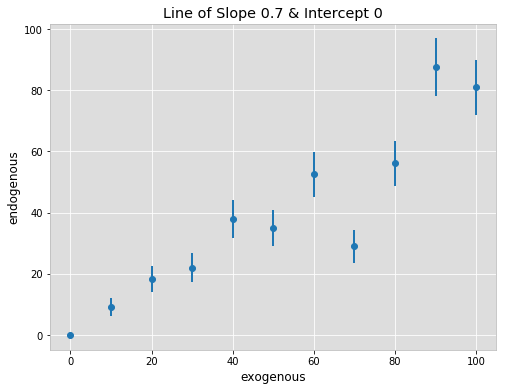

In [131]:
x = np.linspace(0,100,11)
y = line(0.7, x, 0, errors)

err = errors(y)

plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerr=err, fmt='o')
# plt.plot(x,y,'r--', lw=1)
plt.title("Line of Slope {} & Intercept {}".format(0.7,0))
plt.xlabel("exogenous")
plt.ylabel("endogenous")

**Figure 1**: Line function plotted with slope 0.7, intercept 0, and error value of the square root of x (increases as X increases)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [122]:
x_constant = sm.add_constant(x)
print(y,x,x_constant)

[  0.           3.31888019   7.85835864  20.62606368  25.42465867
  20.89545714  28.53181722  41.5007457   64.74273633  70.99309852
  81.0908909 ] [   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.] [[   1.    0.]
 [   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [123]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     253.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.98e-08
Time:                        15:05:06   Log-Likelihood:                -38.879
No. Observations:                  11   AIC:                             79.76
Df Residuals:                      10   BIC:                             80.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7056      0.044     15.915      0.000         0.607     0.804
==============================================================================
Omnibus:                        0.529   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.518
Skew:                           0.054   Prob(JB):                        0.772
Kurtosis:                       1.942   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#THE RIGHT WAY
rightfit = smf.OLS(y, x_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     110.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.33e-06
Time:                        15:05:17   Log-Likelihood:                -37.482
No. Observations:                  11   AIC:                             78.96
Df Residuals:                       9   BIC:                             79.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -7.3498      4.555     -1.613      0.141       -17.655     2.955
x1             0.8106      0.077     10.527      0.000         0.636     0.985
==============================================================================
Omnibus:                        1.963   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.362
Skew:                          -0.704   Prob(JB):                        0.506
Kurtosis:                       2.006   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** By comparing the two models, we can see that by adding a constant, the explanatory power of our model decreases from 0.97 to 0.91 (as measured by $R^2$). In the second summary, we can see the constant by 'const' and it's coefficient should be equal to 0 (since it is our intercept). However, our OLS model shifted it to 3.26 which is reflected in the wider confidence interval in our x1 variable. Our first model was better at interpretting the x1 coef/slop at 6.9

# 4. plot the data (as points) and both statsmodels fits

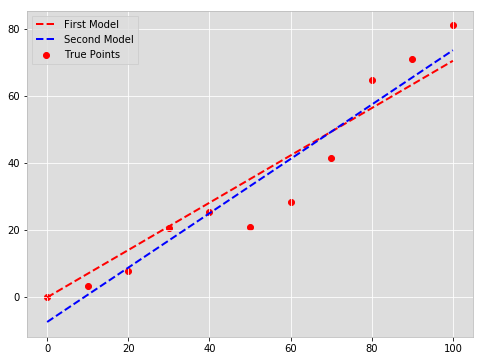

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='red',label='True Points')
plt.plot(x,smfit.predict(x),'r--',label='First Model')
plt.plot(x,rightfit.predict(x_constant),'b--',label='Second Model')
plt.legend()

**Figure 2**: You can see that both models fit relatively well and are very similar. Surprisingly, the second model has a slightly higher slope, which is representative of $R^2$ value.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

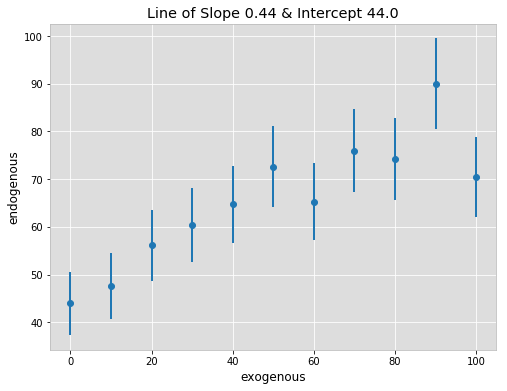

In [132]:
slope = 0.44
intercept = slope*100

y2 = line(slope, x, intercept, errors) # slop of 0.44, intercept of 100
err2=errors(y2)

plt.figure(figsize=(8,6))
plt.errorbar(x, y2, yerr=err2, fmt='o')
plt.title("Line of Slope {} & Intercept {}".format(slope,intercept))
plt.xlabel("exogenous")
plt.ylabel("endogenous")

**Figure 3**: The plots is similar to figure 2 but the slope is obviously less. The error looks like it gets more extreme but this is due to the fact that the endogenous value is contrained more. Notice that the y-intercept is now at 44

# 6. repeat step 3

In [133]:
#THE WRONG WAY
fit1 = smf.OLS(y2, x).fit()
fit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     54.38
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.39e-05
Time:                        15:53:41   Log-Likelihood:                -51.583
No. Observations:                  11   AIC:                             105.2
Df Residuals:                      10   BIC:                             105.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0375      0.141      7.374      0.000         0.724     1.351
==============================================================================
Omnibus:                        0.934   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.694
Skew:                          -0.531   Prob(JB):                        0.707
Kurtosis:                       2.380   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#THE RIGHT WAY
fit2 = smf.OLS(y2, x_constant).fit()
fit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     31.53
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000328
Time:                        15:53:44   Log-Likelihood:                -35.227
No. Observations:                  11   AIC:                             74.45
Df Residuals:                       9   BIC:                             75.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         47.9682      3.711     12.926      0.000        39.573    56.363
x1             0.3522      0.063      5.615      0.000         0.210     0.494
==============================================================================
Omnibus:                        0.915   Durbin-Watson:                   2.371
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.180
Skew:                          -0.312   Prob(JB):                        0.914
Kurtosis:                       2.951   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

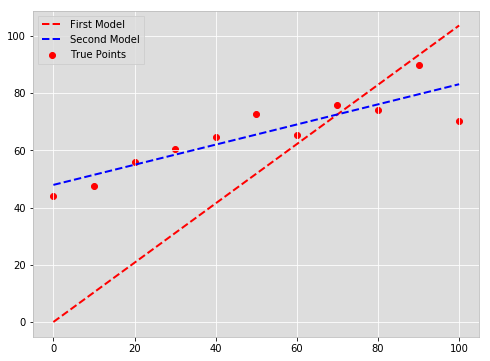

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(x,y2,color='red',label='True Points')
plt.plot(x,fit1.predict(x),'r--',label='First Model')
plt.plot(x,fit2.predict(x_constant),'b--',label='Second Model')
plt.legend()

**Interpretation**: Because we've added a intercept in this example, one can see that adding a constant to our x makes the OLS much more accurate when fitting. Though the $R^2$ value is lower in the second model, we can see that the confidence interval is more constrained for our x1 variable and the coefficient is much closer to our true slope value of 0.44 (vs. a coefficient of 1 for our first model)

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [112]:
def weights(x): 
    '''takes the inverse of the rror'''
    if x[0]==0:
        x[0]=1
    return 1/np.sqrt(x)
weights = weights(x)
weights

array([ 1.        ,  0.31622777,  0.2236068 ,  0.18257419,  0.15811388,
        0.14142136,  0.12909944,  0.11952286,  0.1118034 ,  0.10540926,
        0.1       ])

In [113]:
mod = smf.WLS(y2,x_constant,weights=weights).fit()
mod.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            WLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     52.45
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.86e-05
Time:                        13:30:41   Log-Likelihood:                -36.554
No. Observations:                  11   AIC:                             77.11
Df Residuals:                       9   BIC:                             77.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         43.2165      2.575     16.786      0.000        37.393    49.040
x1             0.4466      0.062      7.242      0.000         0.307     0.586
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.404
Skew:                          -0.324   Prob(JB):                        0.817
Kurtosis:                       2.321   Cond. No.                         55.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Figure 5**: This model shows an improvement from fit # 2 above. For one the $R^2$ value increased from 0.75 to 0.85. Also the confidence intervals for the constant and x1 values are much more constrained

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

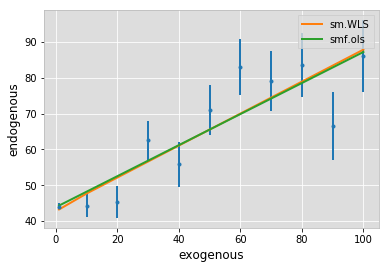

In [115]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y2, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y2, yerr=errors(x), fmt='.')
pl.plot(x, mod.fittedvalues, '-', label="sm.WLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();